In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
import torch
from sklearn import datasets
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torchncmml.utils import get_class_mean
from torchncmml.ncmml import NCMML
from torch.optim import SGD
from sklearn.model_selection import train_test_split


In [3]:
iris = datasets.load_iris()
X, y = torch.tensor(iris['data'], dtype=torch.float), torch.tensor(iris['target'], dtype=torch.long)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=10)
mean_features = get_class_mean(train_dataloader)

for idx, c_m in enumerate(mean_features):
    print(f'Class {idx}, feature mean : \n{c_m}')

Class 0, feature mean : 
tensor([5.0000, 3.4647, 1.4882, 0.2471])
Class 1, feature mean : 
tensor([6.0242, 2.7303, 4.2606, 1.3152])
Class 2, feature mean : 
tensor([6.6515, 3.0152, 5.6121, 2.0636])


In [4]:
ncmml = NCMML(in_features=4, out_features=2, mean_features=mean_features, transform='linear', init_method='identity')
optimizer = SGD(ncmml.parameters(), lr=0.1)

for epoch in range(200):
    for batch in train_dataloader:
        features, targets = batch

        optimizer.zero_grad()
        loss, _, _, _ = ncmml(features, targets)
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch} Loss: {loss.detach().item():.3f}')

Epoch: 0 Loss: 0.463
Epoch: 1 Loss: 0.339
Epoch: 2 Loss: 0.377
Epoch: 3 Loss: 0.201
Epoch: 4 Loss: 0.225
Epoch: 5 Loss: 0.161
Epoch: 6 Loss: 0.229
Epoch: 7 Loss: 0.279
Epoch: 8 Loss: 0.252
Epoch: 9 Loss: 0.198
Epoch: 10 Loss: 0.181
Epoch: 11 Loss: 0.207
Epoch: 12 Loss: 0.246
Epoch: 13 Loss: 0.205
Epoch: 14 Loss: 0.176
Epoch: 15 Loss: 0.163
Epoch: 16 Loss: 0.150
Epoch: 17 Loss: 0.152
Epoch: 18 Loss: 0.144
Epoch: 19 Loss: 0.208
Epoch: 20 Loss: 0.122
Epoch: 21 Loss: 0.197
Epoch: 22 Loss: 0.086
Epoch: 23 Loss: 0.084
Epoch: 24 Loss: 0.125
Epoch: 25 Loss: 0.139
Epoch: 26 Loss: 0.121
Epoch: 27 Loss: 0.087
Epoch: 28 Loss: 0.095
Epoch: 29 Loss: 0.099
Epoch: 30 Loss: 0.056
Epoch: 31 Loss: 0.086
Epoch: 32 Loss: 0.029
Epoch: 33 Loss: 0.109
Epoch: 34 Loss: 0.082
Epoch: 35 Loss: 0.068
Epoch: 36 Loss: 0.049
Epoch: 37 Loss: 0.050
Epoch: 38 Loss: 0.104
Epoch: 39 Loss: 0.092
Epoch: 40 Loss: 0.080
Epoch: 41 Loss: 0.062
Epoch: 42 Loss: 0.067
Epoch: 43 Loss: 0.091
Epoch: 44 Loss: 0.051
Epoch: 45 Loss: 0.11

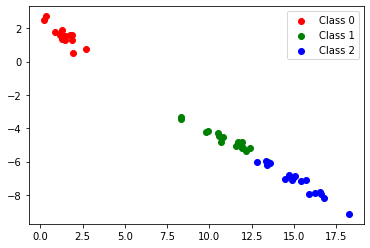

In [10]:
import matplotlib.pyplot as plt

features, targets = zip(*[batch for batch in test_dataloader])
features = torch.cat(features)
targets = torch.cat(targets)

labeled_features = [features[targets == t] for t in targets.unique()]
colors = ['r', 'g', 'b']

ncmml.eval()
for idx, l_features in enumerate(labeled_features):
    X, _, _ = ncmml(l_features)
    X = X.detach().numpy()
    plt.scatter(X[:, 0], X[:, 1], color=colors[idx], label=f'Class {idx}')
plt.legend()
plt.show()
